# Анализ бизнес-показателей приложения Procrastinate Pro+.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

Цель: найти причину убытков и помочь компании выйти в плюс

Задачи:

1. Изучить откуда приходят пользователи и какими устройствами они пользуются;
2. Изучить сколько стоит привлечение пользователей из различных рекламных каналов;
3. Изучить сколько денег приносит каждый клиент;
4. Изучить когда расходы на привлечение клиента окупаются;
5. Изучить какие факторы мешают привлечению клиентов.

План анализа данных:

1. Загрузить данные и подготовить их к анализу:
 1.1.Просмотр основной информации о таблицах
 1.2. Предобработка данных
2. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.
3. Исследовательский анализ данных:
  3.1. Составить профили пользователей.
  3.2. Разбивка по странам.
  3.3. Разбивка по устройствам.
  3.4. Разбивка по рекламным инсточникам
4. Маркетинг:
  4.1. Общая сумма расходов на маркетинг.
  4.2. Распределение расходов по рекламным источникам
  4.3. Динамика изменения расходов во времени
  4.4. Стоимость привлечения одного пользователя.
5. Оценить окупаемость рекламы
  5.1. Окупаемость рекламы с помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
  5.2. Конверсия и удержание пользователей.
  5.3. Окупаемость рекламы с разбивкой по устройствам.
  5.4. Окупаемость рекламы с разбивкой по странам.
  5.5. окупаемость рекламы с разбивкой по рекламным каналам
6. Общий вывод


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. 
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from datetime import datetime, timedelta

In [4]:
from matplotlib import pyplot as plt

In [5]:
visits = pd.read_csv('/datasets/visits_info_short.csv') #посещения
orders = pd.read_csv('/datasets/orders_info_short.csv') #заказы
costs = pd.read_csv('/datasets/costs_info_short.csv') #расходы на рекламу

Рассмотрим таблицу visits

In [6]:
display(visits.head()) # выводим первые 5 строк посещения

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
visits.info() #выводим основную информацию о таблице посещения 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Приведем названия столбцов к нижнему регистру, а также переименуем некоторые из них

In [8]:
visits.columns = visits.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [9]:
# переименование столбцов
visits = visits.rename(columns={'user id' : 'user_id', 'session start' : 'session_start', 'session end' : 'session_end'})

Проверим таблицу visits на наличие явных дубликатов  и пропусков в данных

In [10]:
visits.isna().sum() #к-во пропусков в каждом столбце

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [11]:
visits.duplicated().sum() #поиск строк явных дубликатов

0

Можно сделать вывод, что  в таблице visits отсуствуют явные дубликаты и пропуски 

Рассмотрим таблицу orders

In [12]:
display(orders.head()) #выведем первые 5 строк таблицы заказы

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
orders.info()  #выведем основую информацию о таблице заказы 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Приведем названия столбцов к нижнему регистру, а также переименуем некоторые из них

In [14]:
orders.columns = orders.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [15]:
# переименование столбцов
orders = orders.rename(columns={'user id' : 'user_id', 'event dt' : 'event_dt'})

In [16]:
orders.isna().sum() #к-во пропусков в каждом столбце

user_id     0
event_dt    0
revenue     0
dtype: int64

In [17]:
orders.duplicated().sum() #поиск строк явных дубликатов

0

Можно сделать вывод, что в таблице заказы также отсутствуют пропуски и явные дубликаты

Рассмотрим таблицу costs

In [18]:
display(costs.head()) #выведем первые 5 строк таблицы расходы на рекламу

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [19]:
costs.info() #выведем основную информацию о таблице расходы на рекламу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице costs только столбец Channel написан с заглавной буквы, поэтому приведем его к нижнему регистру

In [20]:
costs.columns = costs.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [21]:
costs.isna().sum() #к-во пропусков в каждом столбце

dt         0
channel    0
costs      0
dtype: int64

In [22]:
costs.duplicated().sum() #поиск строк явных дубликатов

0

Можно заметить, что столбцы даты и времени во всех таблицах принадлежат к типу object. Приведем их к типу datetime. 

In [23]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Вывод: Были изучена основная информация из таблиц посещения, заказы и расходы на рекламу. Заголовки таблиц были приведены к единому стилю: заголовки приведены к нижнему регистру, устранены пробелы - заменены нижним подчеркиванием. Обнаружена проблема в столбцах с датой и временем, тип object заменен на datetime. Также произведена проверка на наличие дубликатов и пропусков в данных, они были не обнаружены. 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [24]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['dt']=pd.to_datetime(profiles['dt'])
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    new_users['dt']=pd.to_datetime(new_users['dt']) 
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [25]:
# функция для расчёта LTV и ROI

# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [26]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [27]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [30]:
# функция для сглаживания датафрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [32]:
#получаем профили пользователей
profiles = get_profiles(visits, orders, costs)

In [33]:
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим максимальную и минимальную даты привлечения пользователей

In [34]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  # момент анализа, максимальная дата привлечения пользователей

In [35]:
print('Минимальная дата привлечения пользователей', min_analysis_date,'\n','Максимальная дата привлечения пользователей',observation_date)

Минимальная дата привлечения пользователей 2019-05-01 00:00:00 
 Максимальная дата привлечения пользователей 2019-10-27 00:00:00


<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Замечательно, у нас есть даты и они совпадают с заданием!
</div>

#### Разбивка по странам

Построим таблицу, отражающую на какую страну приходится больше всего платящих пользователей

In [36]:
countries = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
countries.columns=['Количество пользователей', 'Сумма', 'Доля платящих']
countries = countries.sort_values(by='Доля платящих', ascending=False)
display(countries)

,Количество пользователей,Сумма,Доля платящих
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


Судя по таблице можно сделать вывод, что максимальное количество платящих пользователей приходится на США(6%), однако также можно заметить, что общее количество пользователей США привышает количество пользоваталей в других странах примерно в 6 раз.

#### Разбивка по устройствам 

Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [37]:
devices = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
devices.columns=['Количество пользователей', 'Сумма', 'Доля платящих']
devices = devices.sort_values(by='Доля платящих', ascending=False)
display(devices)

,Количество пользователей,Сумма,Доля платящих
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


Можно сделать вывод, что доля платящих для продукции Apple составляет около 6%, также для пользователей андроид она составляет около 6%. Для пользователей PC она составляет 5%.

#### Разбивка по рекламным источникам

In [38]:
channels = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
channels.columns=['Количество пользователей', 'Сумма', 'Доля платящих']
channels = channels.sort_values(by='Доля платящих', ascending=False)
display(channels)

,Количество пользователей,Сумма,Доля платящих
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747
LeapBob,8553,262,0.030633


Можно сказать, что лидером по количеству пользователей и долей платящих является FaceBoom(29144 пользователей, 12% платящих), также можно выделить TipTop(19561 пользователей, 9% платящих). Однако можно заметить, что наибольшее количество пользователей пришло с organic, т.е. без какой-либо рекламы (56439 пользователей), но также среди них низкий процент платящих пользователей всего 2%.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [39]:
round(costs['costs'].sum(), 2)

105497.3

Общая сумма расходов на маркетинг составляет 105497,3

#### Распределение расходов по рекламным источникам

Сгруппируем расходы по рекламным источникам и посчитаем сумму для каждого.

In [40]:
channel_costs = costs.groupby('channel').agg({'costs': ['sum']})
channel_costs['share'] = round(channel_costs.costs *100 / costs['costs'].sum(), 2)
channel_costs.columns=['Сумма', 'Процент затрат']
channel_costs = channel_costs.sort_values(by='Сумма', ascending=False)
display(channel_costs)

,Сумма,Процент затрат
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Наибольшие траты пошли на такие рекламные источники как Tip Top и Face Boom, они составляют 54751,3 и 32445,6 соотвественно. Можно также заметить, что они же являются лидерами по привлечению пользователей и проценту платящих пользователей. Минимальные же траты на такие источники как MediaTornado и YRabbit(954,48 и 944,22 соотвественно).

####  Динамика изменения расходов во времени

In [41]:
costs['dt'] = pd.to_datetime(costs['dt']) #приведем столбец dt к типу datetime
costs['month'] = costs['dt'].dt.month #создадим столбец с месяцами
costs['week'] =  costs['dt'].dt.isocalendar().week #создадим столбец с неделями


Построим график динамики изменения расходов по месяцам и неделям

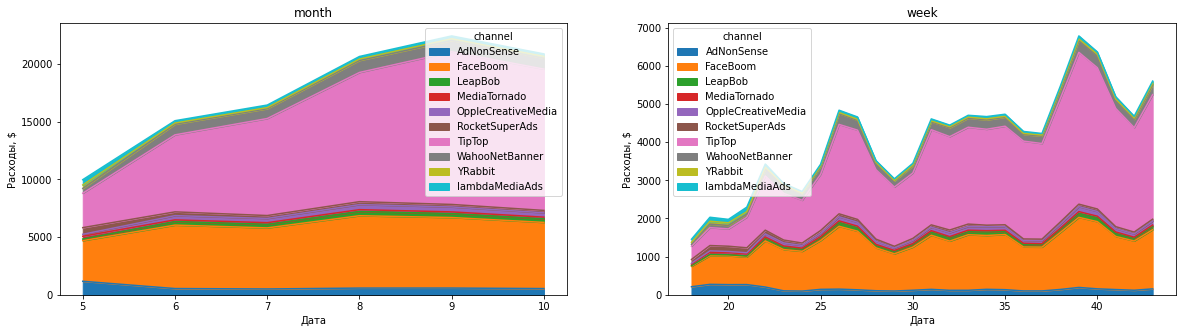

In [42]:
columns = ['month', 'week']
plt.subplots(figsize = (20, 5))
for i, col in enumerate(columns):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, i + 1))
    plt.title(col)
    plt.xlabel('Дата')
    plt.ylabel('Расходы, $')
plt.show()

Вывод: Можно заметить, что расходы на Tip Top растут существенно с каждым месяцем, расходы на другие источники растут гораздо медленнее. 

#### Стоимость привлечения одного пользователя (CAC) из каждого источника в среднем

Определим горизонт анализа

In [43]:
horizon_days = 14 #горизонт анализа

In [44]:
# получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)


Выведем средний сас по каналам привлечения

In [45]:
#средний сас по каналам привлечения
display(roi['cac'].sort_values(ascending=False))

channel
TipTop                2.733487
FaceBoom              1.113659
AdNonSense            1.008023
lambdaMediaAds        0.726839
WahooNetBanner        0.601685
RocketSuperAds        0.420648
OppleCreativeMedia    0.249905
MediaTornado          0.219005
YRabbit               0.216684
LeapBob               0.209947
Name: cac, dtype: float64

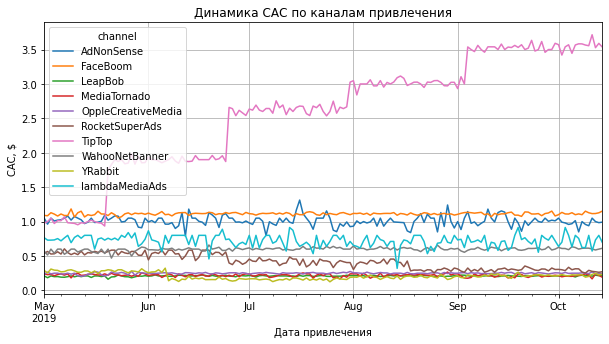

In [46]:
#график истории изменений CAC

roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))


plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [47]:
# получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)


Рассчитаем САС на одного пользователя для всего проекта

In [48]:
display(roi['cac'])

cohort
All users    0.690417
Name: cac, dtype: float64

Вывод: привлечение одного пользователя через TipTop обошлось компании в среднем в 2,73, через FaceBoom в среднем в 1,11. Судя по графику можно заметить, что средняя стоимость привлечения одного пользователя для всех источников кроме TipTop изменяется примерно равномерно. В свою очередь TipTop заметно выделяется на их фоне, средний САС для него значительно увеличивается с каждым месяцем. Можно также сказать, что привлечение одного пользователя через TipTop выше САС для всего проекта на 1,9, а для FaceBoom на 0,41 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Окупаемость рекламы c помощью графиков LTV и ROI

Исключаем из анализа органических пользователей 

In [49]:
profiles = profiles.query('channel != "organic"')

In [50]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

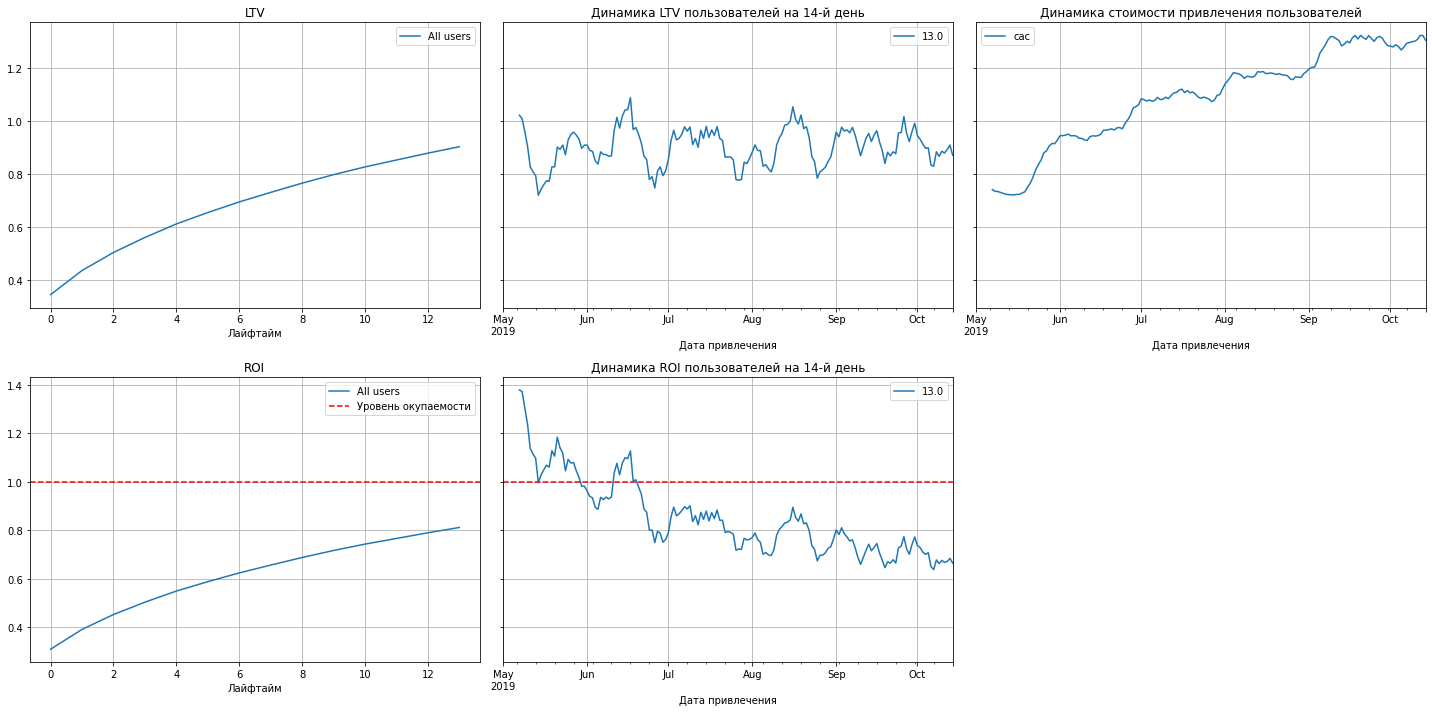

In [51]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Вывод: Судя по графикам можно сделать вывод, что в общем реклама не окупается. ROI едва доходит до уровня окупаемости(81%). САС не стабилен, а стремительно растет. Предположительно, можно сделать вывод, что дело в распределении рекламного бюджета.

#### Конверсия и удержание пользователей

Расмотрим конверсии и удержание пользователей по регионам, устройствам и рекламным источникам.

Конверсия с разбивкой по странам

In [52]:
# получите сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion( profiles, orders, observation_date,  horizon_days, dimensions=['region']) 

Построим графики конверсии и динамики изменения конверсии по странам

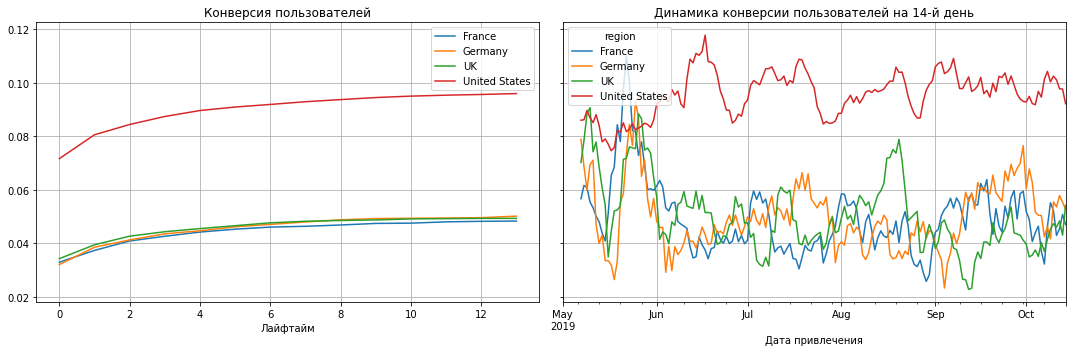

In [53]:
 plot_conversion(conversion, conversion_history, horizon_days, window=7)

Удержание пользователей по странам

In [54]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

Построим графики удержания и динамики изменения удержания по странам

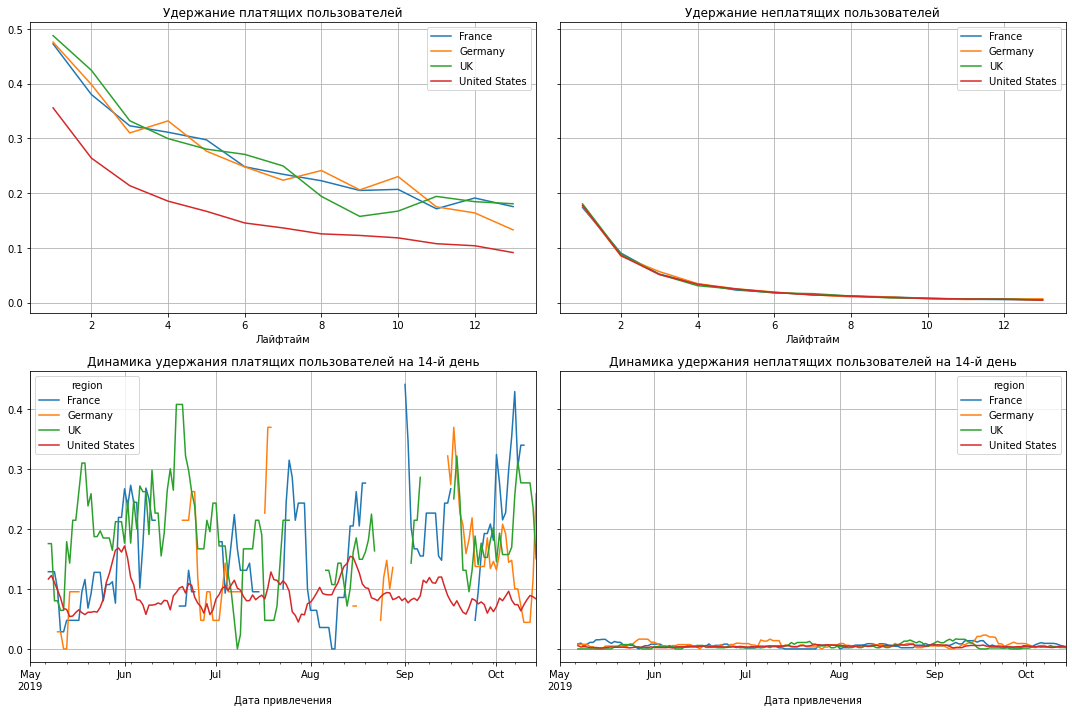

In [55]:
plot_retention(retention, retention_history, horizon_days, window=7)

Вывод: Судя по графикам можно сделать вывод, что пользователи из США конвертируются очень хорошо, причем постоянно, что можно наблюдать и на графике динамики конверсии на 14-ый день. Однако пользователи из США стабильно плохо удерживаются, что можно заметить как на графике удержания, так и в динамике на 14-ый день.

Конверсия с разбивкой по устройствам

In [56]:
conversion_raw, conversion, conversion_history = get_conversion( profiles, orders, observation_date,  horizon_days, dimensions=['device']) 

Построим графики конверсии и динамики изменения конверсии по устройствам

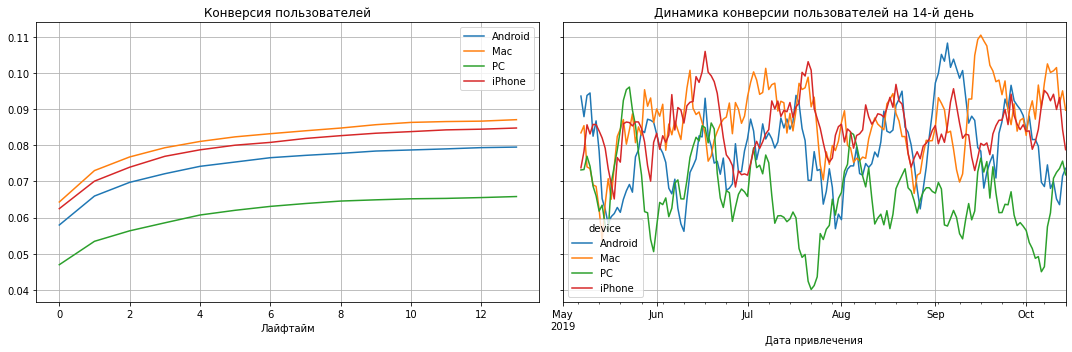

In [57]:
 plot_conversion(conversion, conversion_history, horizon_days, window=7)

Удержание пользователей по устройствам

In [58]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

Построим графики удержания и динамики изменения удержания по устройствам

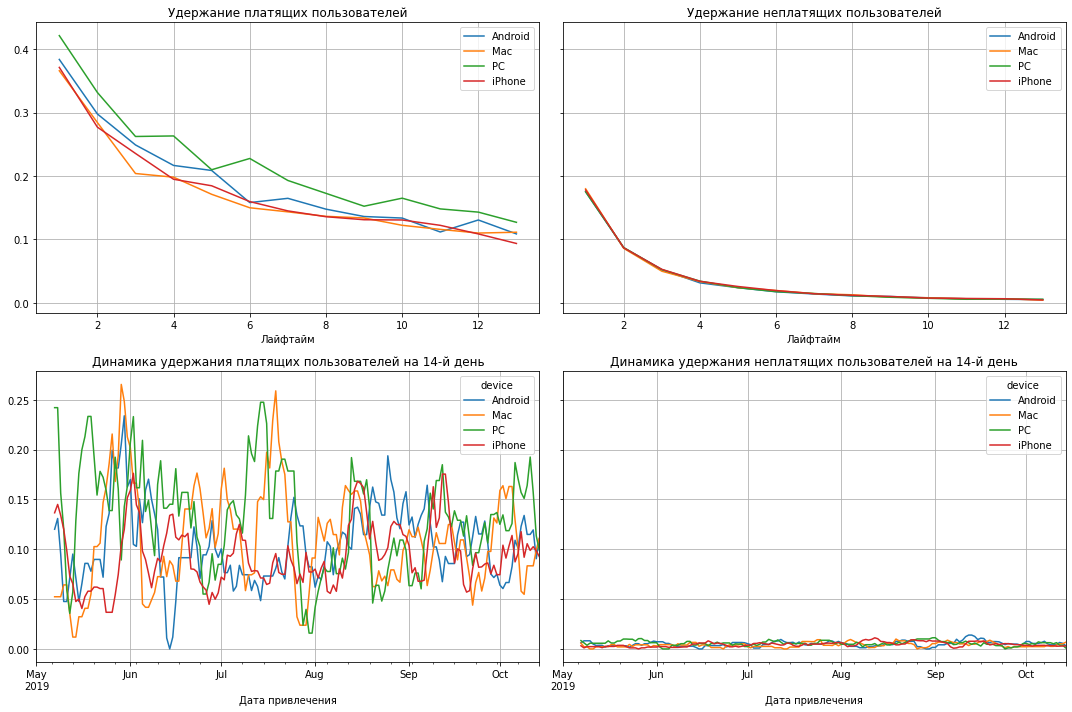

In [59]:
plot_retention(retention, retention_history, horizon_days, window=7)

Вывод: Можно заметить, что пользователи Mac, Iphone и Android хорошо конвертируются, однако удержание пользователей на устройствах Mac, Iphone ниже чем у других устройств.

Конверсия с разбивкой по рекламным источникам

In [60]:
conversion_raw, conversion, conversion_history = get_conversion( profiles, orders, observation_date,  horizon_days, dimensions=['channel']) 

Построим графики конверсии и динамики изменения конверсии по рекламным источникам

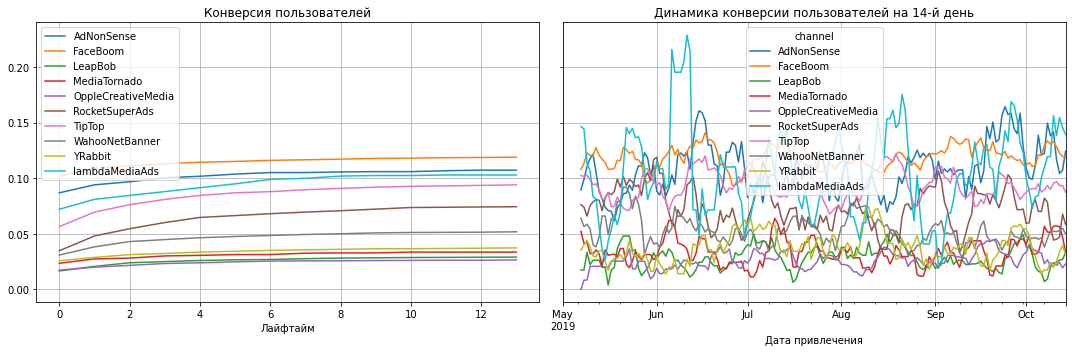

In [61]:
 plot_conversion(conversion, conversion_history, horizon_days, window=7)

Удержание пользователей по рекламным источникам

In [62]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

Построим графики удержания и динамики изменения удержания по рекламным источникам

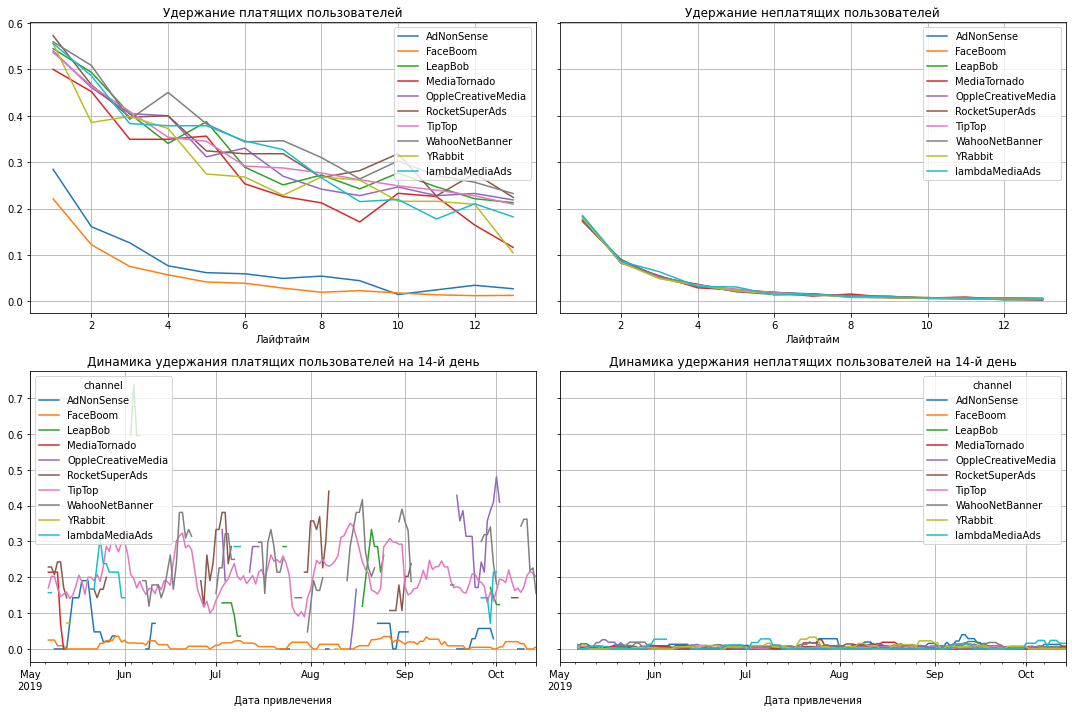

In [63]:
plot_retention(retention, retention_history, horizon_days, window=7)

Вывод: Судя по графикам, можно сделать вывод, что пользователи привлеченные по рекламномым источникам FaceBoom и AdNonSense довольно хорошо конвертируются, однако видно, что они стабильно плохо удерживаются. 

#### Окупаемость рекламы с разбивкой по устройствам

In [64]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

Построим графики ltv и roi с разбивкой по устройствам

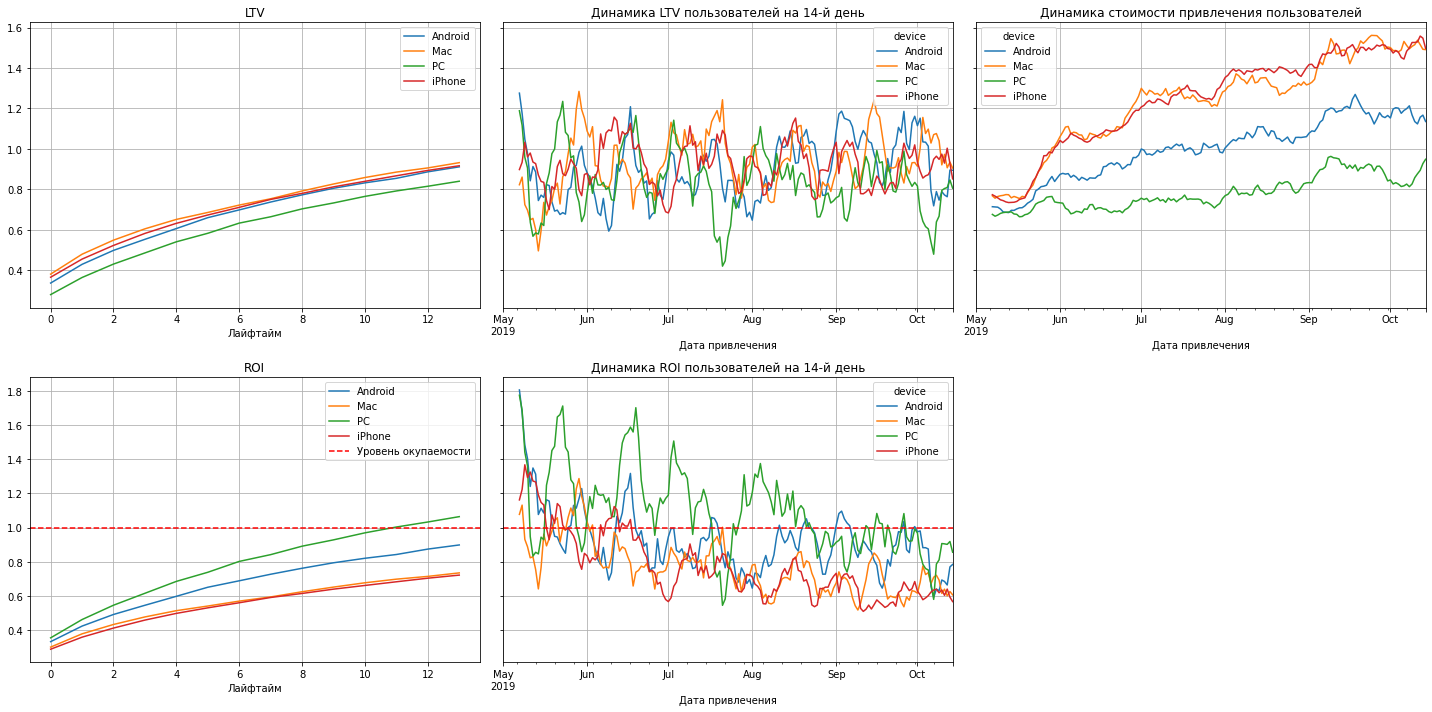

In [65]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Вывод: Можно заметить, что Mac и Iphone находятся ниже уровня окупаемости. Однако судя по динамики стоимости привлечения пользователей, Mac и Iphone являются самыми затратными по привлечению. Динамика roi на 14-ый день снижается ниже уровня окупаемости. 

#### Окупаемость рекламы с разбивкой по странам. 

In [66]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

Построим график ltv и roi с разбивкой по странам

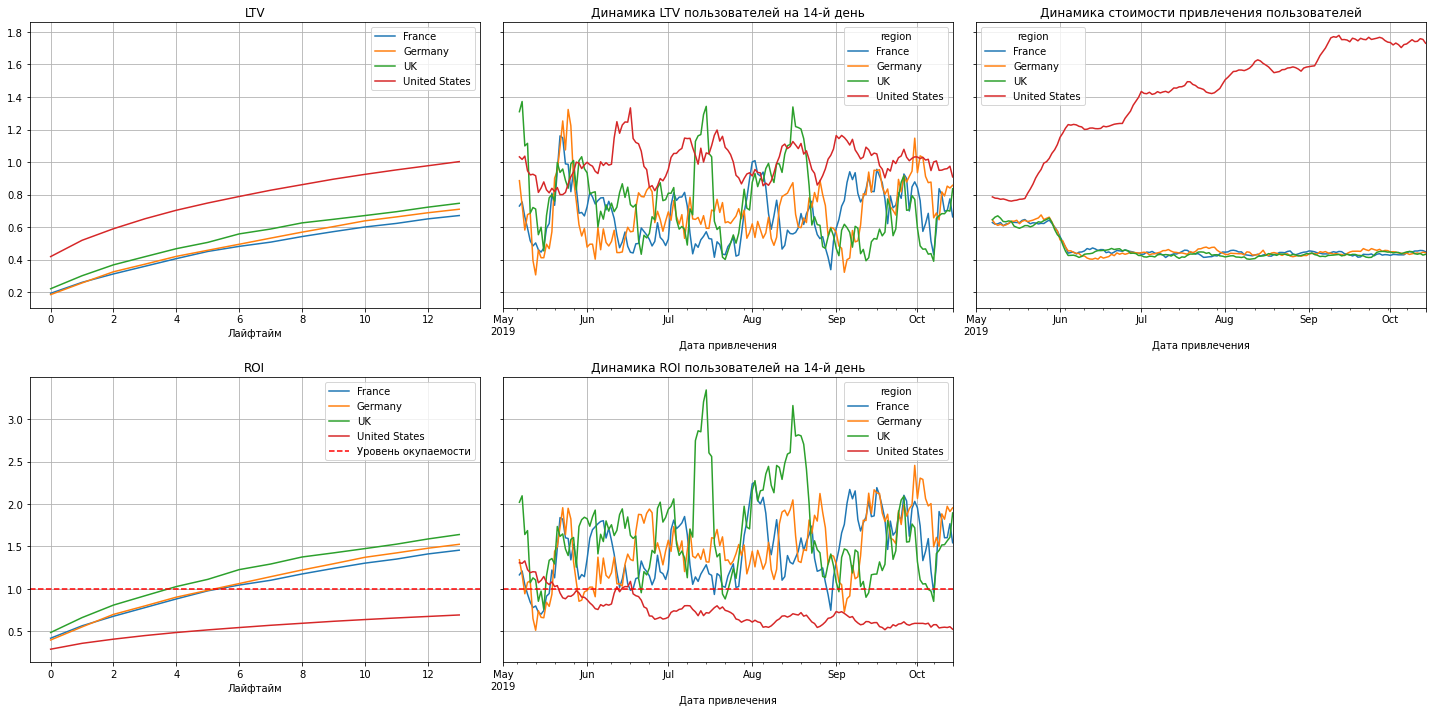

In [67]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Вывод: пользователи из США по ROI находятся ниже уровня окупаемости, несмотря на то, что на их привлечение ушло значительно больше средств чем на пользователей из других стран, судя по динамике стоимости привлечения пользователей. Динамика ROI на 14-ый также стремительно падает ниже уровня окупаемости для США, другие же страны по прежнему остаются выше. 

#### Окупаемость рекламы с разбивкой по рекламным каналам.

In [68]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

Построим график ltv и roi с разбивкой по рекламным каналам

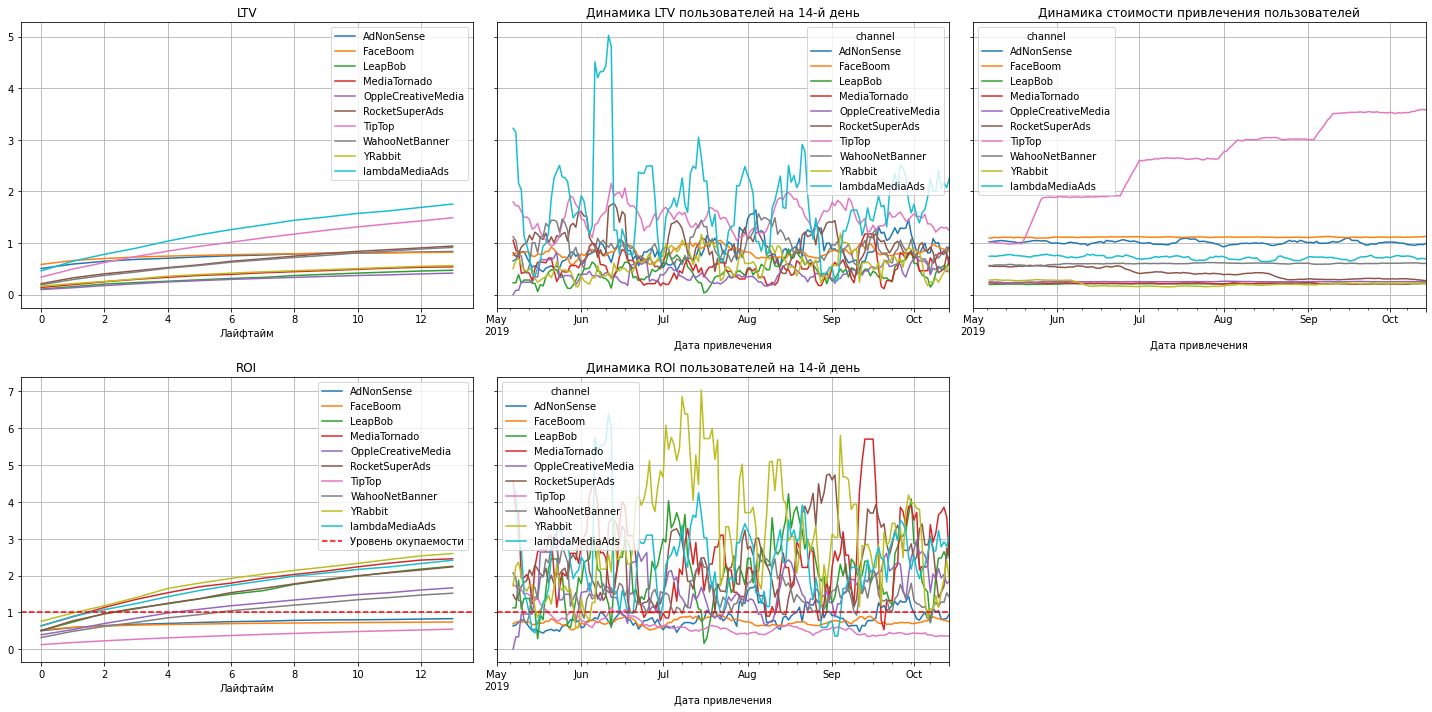

In [69]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Вывод: Можно сделать вывод, что Tip Top, FaceBoom, AdNonSense находятся ниже уровня окупаемости, это видно на графике ROI и динамике ROI на 14-ый день. Однако стоимость привлечения пользователей через Tip Top значительно растет с каждым месяцем. Расходы на Tip Top можно назвать чрезмерными, ведь он не приносит такой окупаемости какую должен был.


Рассмотрим окупаемость рекламы в Европе по рекламным источникам

In [70]:

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
   profiles.query('region in ["UK", "Germany", "France"]'), orders, observation_date, horizon_days, dimensions=['channel']
)

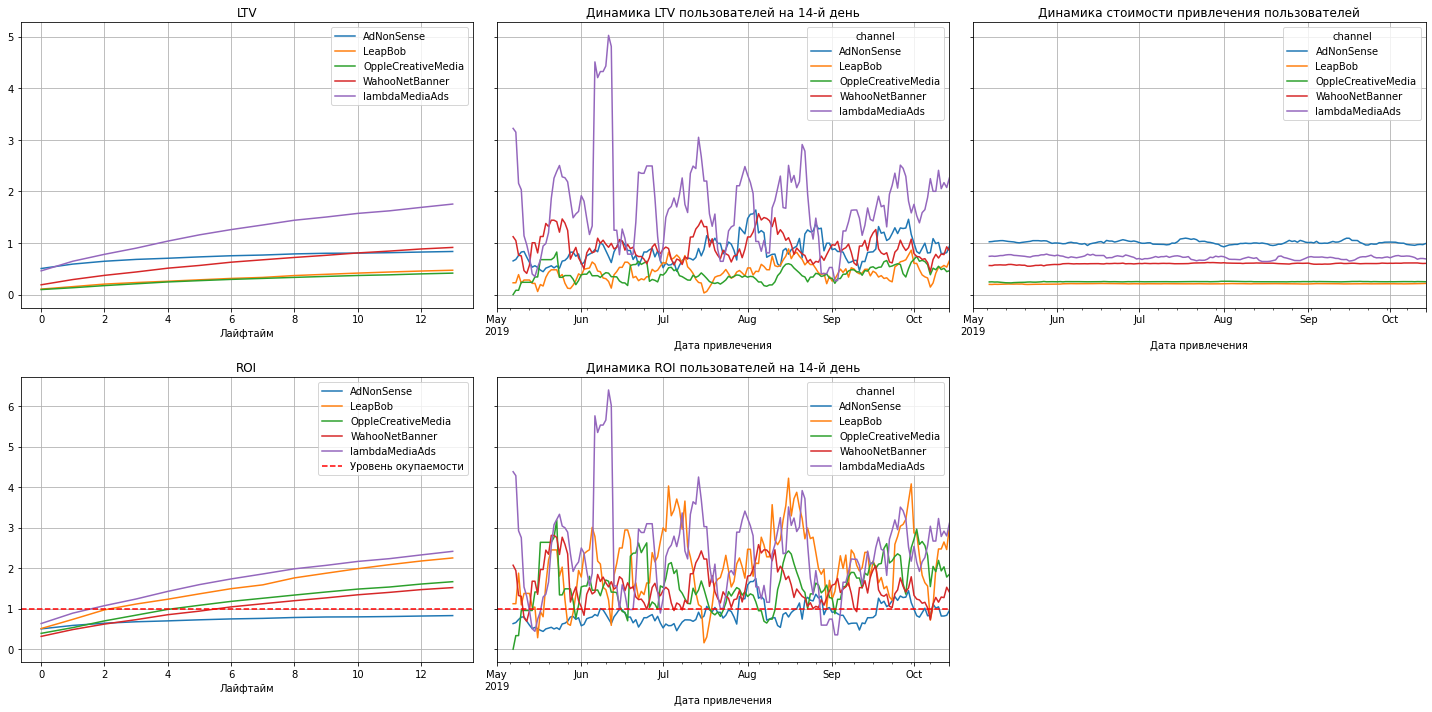

In [71]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Рассмотрим окупаемость рекламы для США по рекламным источникам

In [72]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
   profiles.query('region in ["United States"]'), orders, observation_date, horizon_days, dimensions=['channel']
)

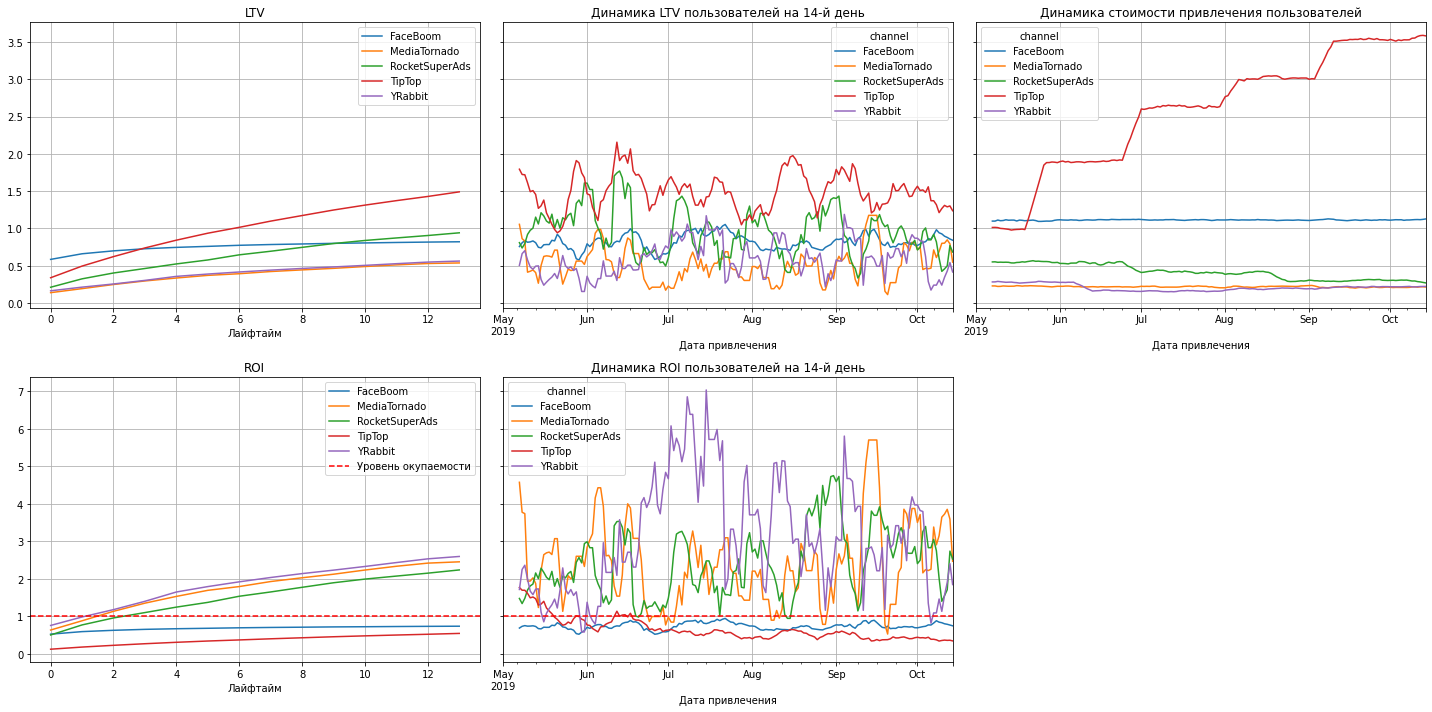

In [73]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

#### Окупается ли реклама, направленная на привлечение пользователей в целом?

Можно сказать, что в целом реклама направленная на привлечение пользователей не окупилась, расходы на некоторые источники были слишком большими, а вложенные деньги не окупились.

#### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Можно сказать, что негативное влияние на окупаемость рекламы представляют Mac, Iphone, США и рекламные каналы - Tip Top и FaceBoom. Расходы на привлечение пользователей в них очень высокие, однако совершенно не окупаются. 

#### Чем могут быть вызваны проблемы окупаемости?

Проблемы окупаемости могут быть вызваны чрезмерными расходами на привлечение пользователей. Возможно, стоит отказаться от таких дорогих рекламных источников и выбрать более оптимальные варианты. Также не стоит тратить большие суммы на привлечение пользователей из США и пользователей Apple.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Вывод: В ходе работы былы проанализированы данные развлекательного приложения Procrastinate Pro+. Была проведена предобработка данных: названия столбцов были приведены к нижнему регистру, пробелы заменены нижним подчеркиванием. Также в столбцах посвященных дате и времени был изменен тип данных с object на datime. Пропусков и дубликатов в данных не было обнаружено.
В ходе исследовательского анализа были созданы профили пользователей, а также определены минимальная дата привлечения пользователей - 01.05.2019 и максимальная дата - 27.10.2019. 

Также удалось выяснить что максимальное количество платящих пользователей приходит из США(где процент платящих пользователей составляет 7%), также можно заметить что общее количество пользователей из США превышает количество пользователей в других странах примерно в 6 раз. Доля платящих пользователей для Mac, Iphone, Android составляет 6%, для PC - 5%. Лидерами по количеству пользователей и долей платящих пользователем являются рекламные источники FaceBoom(29144 пользователей, 12% платящих) и Tip Top (19561 пользователей, 9% платящих).Однако можно заметить, что наибольшее количество пользователей пришло с organic, т.е. без какой-либо рекламы, но процент платящих пользователей среди них составляет всего 2%.

Общая сумма расходов на маркетинг составила 105497,3. Наибольшие траты пошли на такие рекламные источники как FaceBoom и Tip Top, они составляют соответственно 54751,3 и 32445,6. Минимальные траты на такие источники как MediaTornado(954,48) и YRabbit(944,22). Исходя из динамики расходов во времени, расходы на Tip Top растут значительно с каждым месяцем, в то время как расходы на другие источники растут гораздо медленее.

Привлечение одного пользователя через Tip Top составляет в среднем 2,73, через FaceBoom - 1,11. Стоимость привлечения одного пользователя для всех источников кроме Tip Top растет планомерно, однако Tip Top значительно выделяется на их фоне и увеличивается с каждым месяцем.

Был проведен анализ окупаемости рекламы. Можно сказать, что в целом реклама направленная на привлечение пользователей не окупилась. Для пользователей из США, пользователей Iphone и Mac ROI находится ниже уровня окупаемости, а расходы на привлечение пользователей слишком высокие. Аналогично и с рекламными источниками Tip Top,FaceBoom и AdNonSense. Несмотря на то, что такие пользователи привлеченные  с помощью FaceBoom и AdNonSense хорошо конвертируются, но они практически не удерживаются, т.е. не оправдывают вложенных в рекламу средств. 

Рекомендации для отдела маркетинга: стоит сократить вложения в рекламу для таких источников как Tip Top, FaceBoom и AdNonSense, возможно, стоит подумать о целесобразности использования именно этих источников. Также стоит сократить финансирования для привлечения пользователей из СшА, а также пользователей Iphone и Mac. Думаю, что отказываться от рекламы в них не стоит конечно, но стоит ее сократить, потому как она себя не оправдывает. Также думаю, что стоит сократить вложения в  Tip Top, но отказываться от него не стоит. А вот удержание пользователей привлеченных через FaceBoom и AdNonSense очень низкая, а вложения достаточно большие. 
Можно также заметить, что пользователи в UK стабильно оккупаются и удерживаются, возможно, стоит обратить внимание на рекламу именно в этой стране. Также хорошо обстоят дела в Германии. Перспективными рекламными источниками в Европе можно назвать lambdamediaAds, он всегда выше уровня окупаемости, в динамике тоже. САС для него стабилен. Возможно, стои обратить внимание на этот рекламный источник, сейчас с его помощью привлечено 1557,6 пользователей, но и сумма вложений достаточно небольшая.
Для США стабильно окупается такой источник как RocketSupperAds, можем наблюдать аналогичную ситуацию с lambdamediaAds в Европе. 